In [15]:
#from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import pandas as pd


In [18]:
#train_x, tra(in_y), (test_x, test_y) = fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('fashion-mnist_train.csv',na_values='NA')
test_data = pd.read_csv('fashion-mnist_test.csv',na_values='NA')




In [20]:
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3311 - accuracy: 0.8840 - val_loss: 0.3262 - val_accuracy: 0.8878
Epoch 2/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2642 - accuracy: 0.9039 - val_loss: 0.3360 - val_accuracy: 0.8847
Epoch 3/5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2430 - accuracy: 0.9118 - val_loss: 0.3290 - val_accuracy: 0.8880
Epoch 4/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2219 - accuracy: 0.9185 - val_loss: 0.3325 - val_accuracy: 0.8913
Epoch 5/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2036 - accuracy: 0.9266 - val_loss: 0.3346 - val_accuracy: 0.8942


In [33]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.3570 - accuracy: 0.8891


In [34]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [35]:
predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 17ms/step


In [36]:
#import numpy as np

In [41]:
label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

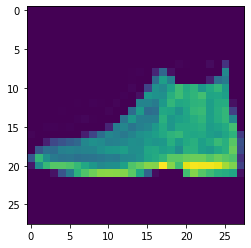

In [42]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show